In [1]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [2]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [3]:
model = Classifier()

images, labels = next(iter(testloader))
ps = torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


In [4]:
top_p, top_class = ps.topk(1,dim = 1)
print(top_class[:10,:])

tensor([[0],
        [6],
        [6],
        [6],
        [0],
        [0],
        [6],
        [0],
        [0],
        [6]])


In [5]:
equals = top_class == labels.view(*top_class.shape)

In [6]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 9.375%


In [7]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            for images,labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps,labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1,dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(testloader))
            
            
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.513..  Test Loss: 0.424..  Test Accuracy: 0.848
Epoch: 2/30..  Training Loss: 0.390..  Test Loss: 0.389..  Test Accuracy: 0.859
Epoch: 3/30..  Training Loss: 0.359..  Test Loss: 0.385..  Test Accuracy: 0.861
Epoch: 4/30..  Training Loss: 0.331..  Test Loss: 0.378..  Test Accuracy: 0.865
Epoch: 5/30..  Training Loss: 0.315..  Test Loss: 0.364..  Test Accuracy: 0.868
Epoch: 6/30..  Training Loss: 0.304..  Test Loss: 0.372..  Test Accuracy: 0.870
Epoch: 7/30..  Training Loss: 0.291..  Test Loss: 0.383..  Test Accuracy: 0.865
Epoch: 8/30..  Training Loss: 0.281..  Test Loss: 0.347..  Test Accuracy: 0.879
Epoch: 9/30..  Training Loss: 0.272..  Test Loss: 0.360..  Test Accuracy: 0.877
Epoch: 10/30..  Training Loss: 0.265..  Test Loss: 0.369..  Test Accuracy: 0.871
Epoch: 11/30..  Training Loss: 0.254..  Test Loss: 0.374..  Test Accuracy: 0.877
Epoch: 12/30..  Training Loss: 0.249..  Test Loss: 0.405..  Test Accuracy: 0.871
Epoch: 13/30..  Training Loss: 0.243.

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

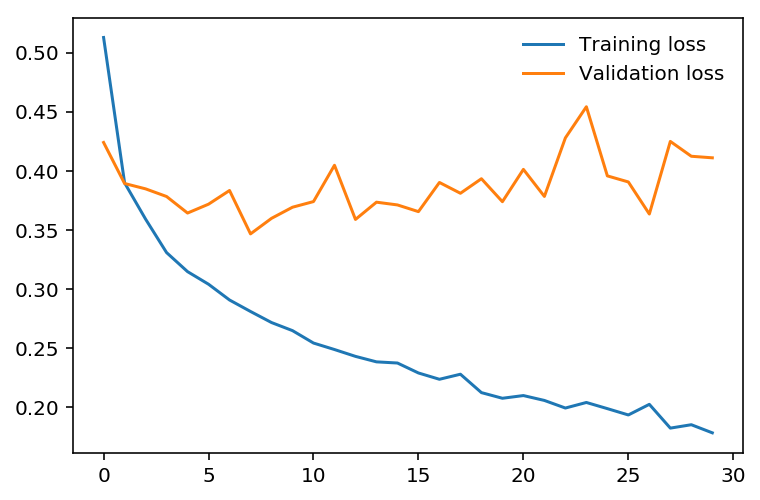

In [9]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [18]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
        self.dropout = nn.Dropout(p = 0.2)
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        x = F.log_softmax(self.fc4(x), dim = 1)
        
        return x
        

In [19]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

epochs = 30

train_losses, test_losses = [], []

for e in range (epochs):
    running_loss = 0
    for images,labels in trainloader:
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss
        
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1,dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                
                accuracy += torch.mean(equals.type(torch.FloatTensor))
            model.train()
            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(testloader))
            
            
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))  

Epoch: 1/30..  Training Loss: 0.596..  Test Loss: 0.493..  Test Accuracy: 0.829
Epoch: 2/30..  Training Loss: 0.478..  Test Loss: 0.448..  Test Accuracy: 0.838
Epoch: 3/30..  Training Loss: 0.450..  Test Loss: 0.437..  Test Accuracy: 0.837
Epoch: 4/30..  Training Loss: 0.430..  Test Loss: 0.400..  Test Accuracy: 0.856
Epoch: 5/30..  Training Loss: 0.419..  Test Loss: 0.407..  Test Accuracy: 0.857
Epoch: 6/30..  Training Loss: 0.412..  Test Loss: 0.401..  Test Accuracy: 0.854
Epoch: 7/30..  Training Loss: 0.405..  Test Loss: 0.390..  Test Accuracy: 0.857
Epoch: 8/30..  Training Loss: 0.402..  Test Loss: 0.417..  Test Accuracy: 0.859
Epoch: 9/30..  Training Loss: 0.395..  Test Loss: 0.408..  Test Accuracy: 0.859
Epoch: 10/30..  Training Loss: 0.383..  Test Loss: 0.401..  Test Accuracy: 0.854
Epoch: 11/30..  Training Loss: 0.382..  Test Loss: 0.405..  Test Accuracy: 0.860
Epoch: 12/30..  Training Loss: 0.378..  Test Loss: 0.391..  Test Accuracy: 0.861
Epoch: 13/30..  Training Loss: 0.379.

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

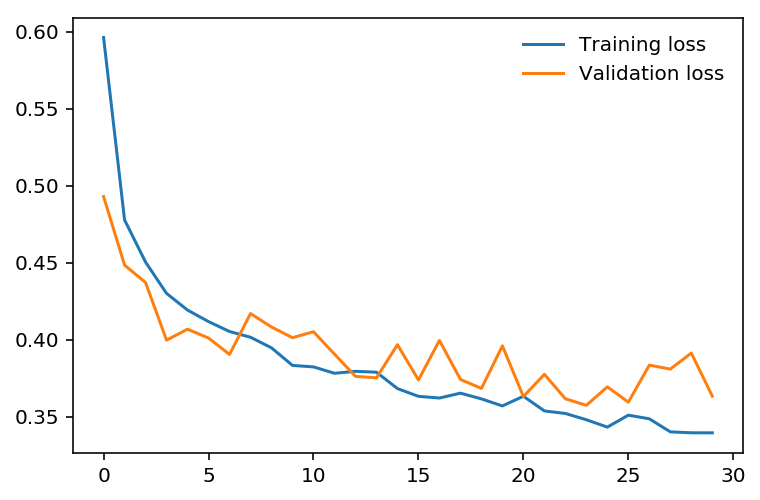

In [21]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [1]:
import helper


model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.view(1, 784)

with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

NameError: name 'model' is not defined